In [1]:
# opencv
import cv2
#from google.colab.patches import cv2_imshow

# for visualizing the line
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [25]:
# image read, path to jpg, (uploaded directly to opencv, and image will be gone after this session finishes)
img = cv2.imread("test_photo/2024-04-19-122414.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# image info, height and width with .shape
print(img.shape)

error: OpenCV(4.5.4) ./modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [34]:
# webcam photo test
# start camera
cam = cv2.VideoCapture(0)

[ WARN:0] global ./modules/videoio/src/cap_gstreamer.cpp (1100) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


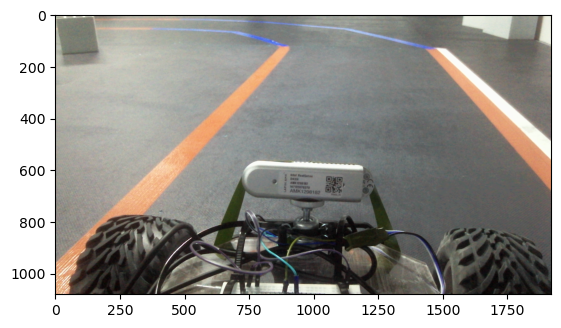

In [35]:
# print frame
ret, frame = cam.read()
plt.imshow(frame)
img = frame
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [37]:
# stop camera
cam.release()

In [27]:
# variables for line
height, width, colorlayers = img.shape
img.shape

(1080, 1920, 3)

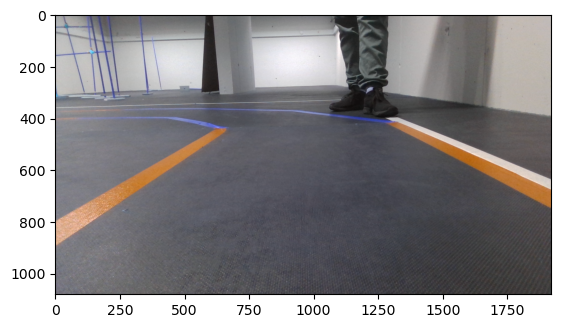

In [28]:
# show pic*
plt.imshow(img)

In [32]:
# green vertical drawn in the middle
#vertical_line = int(width/2)
#cv2.line(img, (vertical_line, 0), (vertical_line, height), (0, 255, 0), 3)
#cv2_imshow(img)

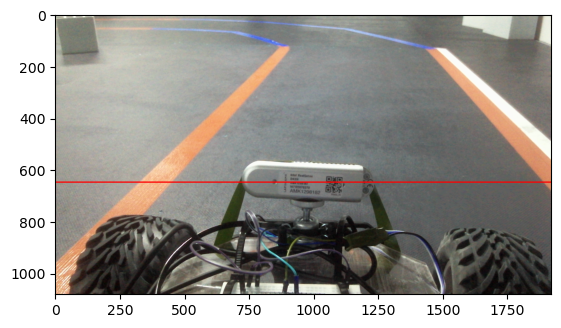

In [36]:
# red horizontal line to help regognizing the wanted area (choosing3/4) of the pic height
horizontal_line = int(height * (3/5))
cv2.line(img, (0, horizontal_line), (width, horizontal_line), (255, 0, 0), 3)
plt.imshow(img)

In [41]:
# colors, BGR variables

blue = 2
green = 1
red = 0

In [42]:
# empty array
values = []

In [43]:
for pixellocation in range(0, width):
  # print(img[horizontal_line + 5, pixellocation])
  # here I need a code snippet to make array left / right to store values that are less / more than middle point
  row = [pixellocation, img[horizontal_line + 5, pixellocation][blue], img[horizontal_line + 5, pixellocation][green], img[horizontal_line + 5, pixellocation][red]]
  values.append(row)

print(values)

[[0, 134, 143, 159], [1, 135, 144, 160], [2, 134, 145, 158], [3, 135, 146, 159], [4, 139, 153, 163], [5, 140, 155, 162], [6, 142, 154, 160], [7, 142, 155, 156], [8, 140, 153, 152], [9, 139, 153, 149], [10, 138, 151, 146], [11, 138, 151, 146], [12, 140, 150, 144], [13, 145, 155, 149], [14, 145, 155, 147], [15, 145, 155, 147], [16, 145, 152, 147], [17, 142, 149, 144], [18, 139, 149, 145], [19, 140, 150, 146], [20, 139, 149, 146], [21, 139, 149, 146], [22, 140, 150, 147], [23, 139, 148, 148], [24, 140, 149, 151], [25, 137, 145, 150], [26, 137, 145, 152], [27, 137, 145, 152], [28, 137, 145, 152], [29, 138, 146, 153], [30, 138, 146, 155], [31, 142, 150, 159], [32, 145, 153, 162], [33, 149, 157, 166], [34, 149, 156, 168], [35, 149, 156, 168], [36, 146, 154, 163], [37, 145, 153, 160], [38, 145, 153, 158], [39, 146, 154, 159], [40, 149, 157, 162], [41, 149, 157, 162], [42, 149, 158, 160], [43, 145, 154, 154], [44, 143, 153, 150], [45, 140, 150, 147], [46, 140, 150, 147], [47, 140, 150, 147], [

<AxesSubplot:xlabel='x-location'>

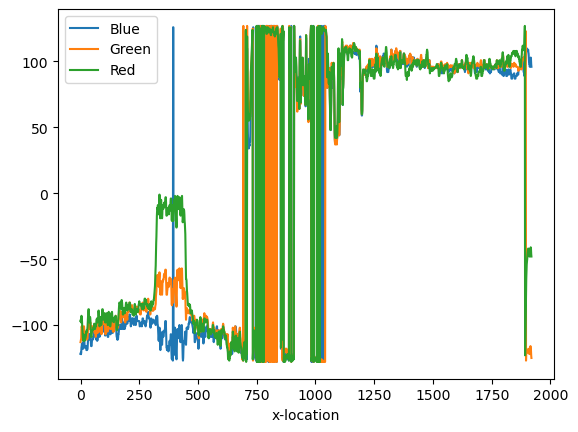

In [44]:
# pandas dataframe, plot the blue areas
df = pd.DataFrame(values, columns=["x-location", "Blue", "Green", "Red"])
df.plot(x="x-location")

In [41]:

# NIKITA, values for r_line and l_line

l_line = 0

for x in range(int(width/2), 0, -1):
  if img[horizontal_line + 5, x][blue] >= 190 or img[horizontal_line + 5, x][green] >= 190 or img[horizontal_line + 5, x][red] >= 190:
    l_line = x
    break
  continue


r_line = 0

for x in range(int(width/2), width):
  if img[horizontal_line + 5, x][blue] >= 190 or img[horizontal_line + 5, x][green] >= 190 or img[horizontal_line + 5, x][red] >= 190:
    r_line = x
    break
  continue
  
print(r_line, l_line)

1704 808
